<a href="https://colab.research.google.com/github/GushintaNWorks/Projects/blob/main/Data_Pipeline_dan_Analisis_Produksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LATAR BELAKANG**

---

Dalam dunia bisnis modern, pengelolaan dan analisis data produksi menjadi faktor krusial dalam meningkatkan efisiensi operasional dan pengambilan keputusan berbasis data. Dataset produksi yang besar sering kali memerlukan proses ETL (Extract, Transform, Load) sebelum dapat digunakan untuk analisis lebih lanjut. Oleh karena itu, proyek ini bertujuan untuk menyiapkan data produksi dengan melakukan ekstraksi, transformasi, serta visualisasi guna mendapatkan wawasan mendalam mengenai tren produksi.



# EKSTRASI DATA

In [ ]:
!git clone https://github.com/GushintaNWorks/Projects.git

Cloning into 'Projects'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 8 (delta 0), reused 2 (delta 0), pack-reused 6 (from 1)
Receiving objects: 100% (8/8), 80.97 MiB | 21.03 MiB/s, done.


In [ ]:
# unzip file data_source.zip
!unzip /content/Projects/data_sources.zip -d /content/data

Archive:  /content/Projects/data_sources.zip
   creating: /content/data/data_sources/
   creating: /content/data/data_sources/data_products/
   creating: /content/data/data_sources/data_reqruitment/
  inflating: /content/data/data_sources/data_products/Suitcases and Trolley Bags.csv  
  inflating: /content/data/data_sources/data_products/Amazon Fashion.csv  
  inflating: /content/data/data_sources/data_products/Kitchen Storage and Containers.csv  
  inflating: /content/data/data_sources/data_products/Coffee Tea and Beverages.csv  
  inflating: /content/data/data_sources/data_products/Running.csv  
  inflating: /content/data/data_sources/data_products/The Designer Boutique.csv  
  inflating: /content/data/data_sources/data_products/Kids Watches.csv  
  inflating: /content/data/data_sources/data_products/Fashion Sandals.csv  
  inflating: /content/data/data_sources/data_products/Indian Language Books.csv  
  inflating: /content/data/data_sources/data_products/Sportswear.csv  
  inflating

# Analisis Struktur Data

**Mengimport modul yang diperlukan**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import re
import os
import csv
warnings.filterwarnings('ignore')

**Struktur Data**

In [ ]:
# membaca seluruh file dari folder data_product

def crawlFiles(dPath, types = None):
    #dPath = 'C:/Temp', types ='pdf'
    if types:
        return [dPath+'/'+f for f in os.listdir(dPath) if f.endswith('.'+types)]
    else:
        return [dPath+'/'+f for f in os.listdir(dPath)]

path = "/content/data/data_sources/data_products"

dataPath = crawlFiles(path, types = 'csv')

In [ ]:
# melihat jumlah file data
len(dataPath)

140

In [ ]:
# cek kolom data
test1 = pd.read_csv(dataPath[0])
print(test1.keys())

test2 = pd.read_csv(dataPath[67])
print(test2.keys())

test3 = pd.read_csv(dataPath[122])
print(test3.keys())

test4 = pd.read_csv(dataPath[139])
print(test4.keys())

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')
Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')
Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')
Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')


In [ ]:
# cek kategori (sub_category) pada data dengan nama file, apakah sudah sesuai atau belum
print(dataPath[122])
print('\n')
test3.head(4)

/content/data/data_sources/data_products/Motorbike Accessories and Parts.csv




,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Dark Horse Plastic Bicycle Dual Tone Front & R...,car & motorbike,Motorbike Accessories & Parts,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Dark-Horse-Bicycle-Mudgu...,3.9,947,₹299,₹899
1,SHIVEXIM Waterproof Rechargeable USB Charging ...,car & motorbike,Motorbike Accessories & Parts,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/ShivExim-Waterproof-Rech...,4.3,"1,626",₹699,₹999
2,Probiker Leather Half Finger Motorcycle Gloves...,car & motorbike,Motorbike Accessories & Parts,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Probiker-Leather-Finger-...,3.7,"3,514",₹275,₹998
3,Vega Off Road D/V Black Helmet-M,car & motorbike,Motorbike Accessories & Parts,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Vega-Road-V-K_M-Helmet-B...,4.2,"16,634","₹1,545","₹1,871"


In [ ]:
# cek dan menampilkan data .csv yang kosong
empty_files = []
for file in dataPath:
  with open(file, mode='r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    rows = list(reader)
    if len(rows) <= 1:  # jika kondisi ini "true" maka tidak ada data atau hanya header
       empty_files.append(file)

print(f"Jumlah file yang kosong: {len(empty_files)}")
print("File CSV yang kosong:")
for empty_file in empty_files:
    print(empty_file)

Jumlah file yang kosong: 27
File CSV yang kosong:
/content/data/data_sources/data_products/All Video Games.csv
/content/data/data_sources/data_products/Gaming Accessories.csv
/content/data/data_sources/data_products/Blu-ray.csv
/content/data/data_sources/data_products/Fiction Books.csv
/content/data/data_sources/data_products/Textbooks.csv
/content/data/data_sources/data_products/Film Songs.csv
/content/data/data_sources/data_products/All Hindi.csv
/content/data/data_sources/data_products/Indian Classical.csv
/content/data/data_sources/data_products/Fine Art.csv
/content/data/data_sources/data_products/Indian Language Books.csv
/content/data/data_sources/data_products/All Books.csv
/content/data/data_sources/data_products/All Movies and TV Shows.csv
/content/data/data_sources/data_products/Amazon Pharmacy.csv
/content/data/data_sources/data_products/School Textbooks.csv
/content/data/data_sources/data_products/Entertainment Collectibles.csv
/content/data/data_sources/data_products/All 

Setelah dilakukan pengecekan terhadap data, ditemukan bahwa terdapat 140 file data. Setiap file memiliki struktur kolom yang konsisten, yaitu: name, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, dan actual_price.

Selain itu, dilakukan verifikasi terhadap kesesuaian nilai pada kolom sub_category dengan nama file masing-masing untuk memastikan konsistensi data kategori. Dari hasil analisis, ditemukan bahwa 27 file data tidak berisi informasi apa pun (kosong) dan perlu dilakukan penanganan lebih lanjut.

**fungsi yang akan berguna**

In [ ]:
def read_data(file_path):
    """Read data from CSV file"""
    try:
        df = pd.read_csv(file_path)
        print("Data is read successfully.")
        return df
    except Exception as e:
        print(f"An error occurred while reading a file: {e}")
        return None

def display_data(data, num_rows=5):
    """Displays the first few rows of data"""
    if isinstance(data, pd.DataFrame):
        print(f"\n Number of row: {data.shape[0]}")
        print(f" Number of columns: {data.shape[1]}")
        return data.head(num_rows)
    else:
        print(" Error: Invalid data.")
        return None

def data_info(data):
    """Display data information"""
    if isinstance(data, pd.DataFrame):
        print("\n Informasi Data:")
        return data.info()
    else:
        print(" Error: Invalid data.")

def copy_data(data):
    """Make a copy of the data"""
    if isinstance(data, pd.DataFrame):
        print(" The data has been copied.")
        return data.copy()
    else:
        print(" Error: Invalid data.")
        return None

def count_categories(data):
    """
    Display the number of unique categories in each dataframe column.
    """
    if isinstance(data, pd.DataFrame):
        print("\nJumlah Kategori Unik di Setiap Kolom:")
        for col in data.columns:
            print(f"{col}: {len(set(data[col].dropna().unique()))} kategori")
    else:
        print(" Error: Data tidak valid.")

def display_unique_column_values(data, column):
    """
    Menampilkan nilai unik dari kolom tertentu dalam DataFrame.

    Parameter:
    - data (pd.DataFrame): DataFrame yang ingin diperiksa.
    - column (str): Nama kolom yang ingin ditampilkan nilai uniknya.

    Output:
    - Menampilkan nilai unik dari kolom yang dipilih.
    """
    if isinstance(data, pd.DataFrame):
        if column in data.columns:
            unique_vals = data[column].dropna().unique()
            print(f" Nilai unik di kolom '{column}':\n", unique_vals)
            print(f" Total kategori unik: {len(unique_vals)}")
        else:
            print(f" Error: Kolom '{column}' tidak ditemukan dalam DataFrame.")
    else:
        print(" Error: Data tidak valid.")



In [ ]:
import pandas as pd

# 1️⃣ Fungsi untuk Mengecek Data
def check_duplicates(data):
    """
    Mengecek apakah terdapat duplikasi dalam DataFrame.

    Parameter:
    - data (pd.DataFrame): DataFrame yang ingin diperiksa.

    Output:
    - Menampilkan jumlah duplikasi dalam DataFrame tanpa mencetak berulang.
    """
    if isinstance(data, pd.DataFrame):
        duplicate_count = data.duplicated().sum()
        print(f"🔍 Jumlah data duplikat: {duplicate_count}" if duplicate_count > 0 else "✅ Tidak ada data duplikat.")
    else:
        print("❌ Error: Data tidak valid.")

def check_missing_values(data):
    """
    Mengecek apakah terdapat missing values dalam DataFrame.

    Parameter:
    - data (pd.DataFrame): DataFrame yang ingin diperiksa.

    Output:
    - Menampilkan jumlah missing values di setiap kolom tanpa mencetak berulang.
    """
    if isinstance(data, pd.DataFrame):
        missing_values = data.isnull().sum()
        missing_values = missing_values[missing_values > 0]  # Hanya tampilkan kolom dengan missing values

        if not missing_values.empty:
            print("\n🔍 Jumlah missing values di setiap kolom:\n")
            print(missing_values.to_string())  # Cetak hanya sekali
        else:
            print("✅ Tidak ada missing values dalam DataFrame.")
    else:
        print("❌ Error: Data tidak valid.")

def check_data_summary(data):
    """
    Menampilkan ringkasan jumlah data duplikat dan missing values.

    Parameter:
    - data (pd.DataFrame): DataFrame yang ingin diperiksa.

    Output:
    - Ringkasan jumlah data duplikat dan missing values.
    """
    if isinstance(data, pd.DataFrame):
        print("\n📊 Ringkasan Data:")
        check_duplicates(data)
        check_missing_values(data)
    else:
        print("❌ Error: Data tidak valid.")

# 2️⃣ Fungsi untuk Menghapus Data yang Tidak Diinginkan
def remove_duplicates(data):
    """
    Menghapus data duplikat dalam DataFrame.

    Parameter:
    - data (pd.DataFrame): DataFrame yang ingin dibersihkan.

    Output:
    - DataFrame tanpa data duplikat.
    """
    if isinstance(data, pd.DataFrame):
        before = data.shape[0]
        data = data.drop_duplicates()
        after = data.shape[0]
        print(f"✅ Duplikasi berhasil dihapus. {before - after} baris dihapus.")
        return data
    else:
        print("❌ Error: Data tidak valid.")
        return None

def remove_missing_values(data):
    """
    Menghapus missing values dalam DataFrame.

    Parameter:
    - data (pd.DataFrame): DataFrame yang ingin dibersihkan.

    Output:
    - DataFrame tanpa missing values.
    """
    if isinstance(data, pd.DataFrame):
        before = data.shape[0]
        data = data.dropna()
        after = data.shape[0]
        print(f"✅ Missing values berhasil dihapus. {before - after} baris dihapus.")
        return data
    else:
        print("❌ Error: Data tidak valid.")
        return None


**Menggabungkan Data**

In [ ]:
prod = pd.concat([pd.read_csv(f) for f in dataPath]).reset_index(drop=True)
display_data(prod)


 Number of row: 1103170
 Number of columns: 10


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
0,"wipro 15W B22D LED Cool Day Light Bulb, Pack o...",home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61sxaKt9ec...,https://www.amazon.in/Wipro-Garnet-Base-15-Wat...,4.1,"5,874",₹379,₹850,NaN
1,Magicwand Round Moon Shaped Light Aluminium Al...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61Z7dG5v1K...,https://www.amazon.in/Round-Shaped-Light-Alumi...,3.9,"1,696",₹329,₹999,NaN
2,HOME CUBE Smart Control Sensor Led Night Light...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61e6Kayvjf...,https://www.amazon.in/HOME-CUBE-Control-Bedroo...,4.1,"1,855",₹569,₹999,NaN
3,GlowPro P20 LED Pen Flashlight - Pocket EDC To...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61DDzStFnv...,https://www.amazon.in/GlowPro-P20-LED-Flashlig...,4.1,"1,263",₹350,₹375,NaN
4,X4cart Study Lamp LED Touch Desk Lamp USB Rech...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/31VaYFLBRE...,https://www.amazon.in/X4cart-Lamp-Desk-Recharg...,3.4,62,₹299,₹999,NaN


**Analisis Sumber Data**

In [ ]:
data_info(prod)


 Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         751582 non-null   object 
 6   no_of_ratings   751582 non-null   object 
 7   discount_price  980844 non-null   object 
 8   actual_price    1067544 non-null  object 
 9   Unnamed: 0      551585 non-null   float64
dtypes: float64(1), object(9)
memory usage: 84.2+ MB


In [ ]:
# Menampikan jumlah kategori pada setiap kolom data
count_categories(prod)


Jumlah Kategori Unik di Setiap Kolom:
name: 396210 kategori
main_category: 20 kategori
sub_category: 112 kategori
image: 462414 kategori
link: 551585 kategori
ratings: 88 kategori
no_of_ratings: 8380 kategori
discount_price: 27511 kategori
actual_price: 23170 kategori
Unnamed: 0: 19200 kategori


In [ ]:
check_data_summary(prod)


📊 Ringkasan Data:
✅ Tidak ada data duplikat.

🔍 Jumlah missing values di setiap kolom:

ratings           351588
no_of_ratings     351588
discount_price    122326
actual_price       35626
Unnamed: 0        551585


# Mencadangkan Data dan Eksplorasi Data

**Mencadangkan Data**

In [ ]:
# meng-copy data production, untuk di analisis lebih lanjut
prod_copy = copy_data(prod)

 The data has been copied.


In [ ]:
data_info(prod_copy)


 Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         751582 non-null   object 
 6   no_of_ratings   751582 non-null   object 
 7   discount_price  980844 non-null   object 
 8   actual_price    1067544 non-null  object 
 9   Unnamed: 0      551585 non-null   float64
dtypes: float64(1), object(9)
memory usage: 84.2+ MB


**Analisis Awal**

In [ ]:
# mengecek value unique pada kolom Unnamed: 0
display_unique_column_values(prod_copy, "Unnamed: 0")

 Nilai unik di kolom 'Unnamed: 0':
 [0.0000e+00 1.0000e+00 2.0000e+00 ... 1.9197e+04 1.9198e+04 1.9199e+04]
 Total kategori unik: 19200


In [ ]:
# mengecek value unique pada kolom ratings
display_unique_column_values(prod_copy, "ratings")

 Nilai unik di kolom 'ratings':
 ['4.1' '3.9' '3.4' '4.0' '4.3' '4.4' '3.7' '3.8' '4.2' '4.5' '3.6' '2.9'
 '3.5' '5.0' '4.9' '3.3' '4.6' '3.2' '3.0' '4.7' '3.1' 'Get' '1.0' '4.8'
 '1.9' '2.5' '2.0' '2.7' '2.3' '2.8' '2.6' '2.1' '2.4' '2.2' 4.5 3.3 3.7
 4.2 4.3 4.1 3.8 4.4 4.0 3.5 3.9 '1.5' '1.7' '1.8' 'FREE' '₹99' '1.6'
 '1.4' '1.3' '₹70' 3.4 3.6 3.2 5.0 2.6 4.7 3.0 3.1 4.6 1.0 4.9 2.9 2.7 2.2
 2.5 4.8 2.0 1.7 1.9 2.8 2.4 1.6 2.3 1.8 1.4 1.3 2.1 1.5 '1.1' '1.2'
 '₹68.99' '₹65' '₹100' '₹2.99']
 Total kategori unik: 88


Sebelum dilakukan pembersihan, dilakukan pengecekan terhadap nilai unik yang terdapat dalam kolom ratings. Hasilnya menunjukkan bahwa terdapat 88 kategori nilai unik, yang mencakup:
* Nilai angka dalam format string (misalnya '4.4', '3.9', '4.7'),
* Nilai tidak valid seperti 'FREE', 'Get', dan karakter khusus '₹',
* Angka yang tampaknya tidak sesuai dengan skala rating, seperti '99', '₹68.99', '65', dan '@'.

In [ ]:
# membuat fungsi clean_rating
def clean_rating(rating):
    if isinstance(rating, str):
        if rating in ['FREE', 'Get','₹']:
            return np.nan
    try:
        return float(rating)
    except ValueError:
        return np.nan

In [ ]:
# Menerapkan fungsi clean_rating
prod_copy['cleaned_ratings'] = prod_copy['ratings'].apply(clean_rating)
print(prod_copy[['cleaned_ratings', 'ratings']].tail(15))

         cleaned_ratings ratings
1103155              3.9     3.9
1103156              3.5     3.5
1103157              NaN     Get
1103158              3.4     3.4
1103159              1.0     1.0
1103160              3.6     3.6
1103161              3.6     3.6
1103162              4.0     4.0
1103163              1.4     1.4
1103164              3.9     3.9
1103165              4.4     4.4
1103166              4.4     4.4
1103167              3.5     3.5
1103168              3.8     3.8
1103169              3.8     3.8


In [ ]:
display_unique_column_values(prod, "ratings")
print(f"\n Setelah dibersihkan \n")
display_unique_column_values(prod_copy, "cleaned_ratings")

 Nilai unik di kolom 'ratings':
 ['4.1' '3.9' '3.4' '4.0' '4.3' '4.4' '3.7' '3.8' '4.2' '4.5' '3.6' '2.9'
 '3.5' '5.0' '4.9' '3.3' '4.6' '3.2' '3.0' '4.7' '3.1' 'Get' '1.0' '4.8'
 '1.9' '2.5' '2.0' '2.7' '2.3' '2.8' '2.6' '2.1' '2.4' '2.2' 4.5 3.3 3.7
 4.2 4.3 4.1 3.8 4.4 4.0 3.5 3.9 '1.5' '1.7' '1.8' 'FREE' '₹99' '1.6'
 '1.4' '1.3' '₹70' 3.4 3.6 3.2 5.0 2.6 4.7 3.0 3.1 4.6 1.0 4.9 2.9 2.7 2.2
 2.5 4.8 2.0 1.7 1.9 2.8 2.4 1.6 2.3 1.8 1.4 1.3 2.1 1.5 '1.1' '1.2'
 '₹68.99' '₹65' '₹100' '₹2.99']
 Total kategori unik: 88

 Setelah dibersihkan 

 Nilai unik di kolom 'cleaned_ratings':
 [4.1 3.9 3.4 4.  4.3 4.4 3.7 3.8 4.2 4.5 3.6 2.9 3.5 5.  4.9 3.3 4.6 3.2
 3.  4.7 3.1 1.  4.8 1.9 2.5 2.  2.7 2.3 2.8 2.6 2.1 2.4 2.2 1.5 1.7 1.8
 1.6 1.4 1.3 1.1 1.2]
 Total kategori unik: 41


Setelah dilakukan pembersihan, nilai unik dalam kolom cleaned_ratings berkurang menjadi 41 kategori dari sebelumnya 88 kategori.
* Nilai tidak valid telah berhasil dihapus.
* Format data menjadi lebih bersih, hanya berisi angka yang sesuai dengan skala rating.

Pembersihan ini memastikan bahwa analisis yang dilakukan pada kolom ratings dapat memberikan hasil yang lebih akurat dan bebas dari gangguan data yang tidak relevan.

In [ ]:
# mengecek value unique pada kolom no_of_ratings
display_unique_column_values(prod_copy, "no_of_ratings")

 Nilai unik di kolom 'no_of_ratings':
 ['5,874' '1,696' '1,855' ... 14.0 11.0 141.0]
 Total kategori unik: 8380


Type data pada kolom `no_of_ratings` awalnya adalah object namun dalam pemerosesan ini dicurigai bahwa type data sebenarnya adalah int. Untuk memastikan bahwa type data kolom ini bisa diubah maka, perlu di cek apakah kolom mengandung karakter yang membuat type data menjadi string atau obj.

In [ ]:
#cek apakah value pada variable no_of_ratings mengandung karakter spesial
print(len(prod_copy[prod_copy['no_of_ratings'].str.contains(r'[^\d]', na=False)]))
prod_copy[prod_copy['no_of_ratings'].str.contains(r'[^\d]', na=False)]

73587


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0,cleaned_ratings
0,"wipro 15W B22D LED Cool Day Light Bulb, Pack o...",home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61sxaKt9ec...,https://www.amazon.in/Wipro-Garnet-Base-15-Wat...,4.1,"5,874",₹379,₹850,NaN,4.1
1,Magicwand Round Moon Shaped Light Aluminium Al...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61Z7dG5v1K...,https://www.amazon.in/Round-Shaped-Light-Alumi...,3.9,"1,696",₹329,₹999,NaN,3.9
2,HOME CUBE Smart Control Sensor Led Night Light...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61e6Kayvjf...,https://www.amazon.in/HOME-CUBE-Control-Bedroo...,4.1,"1,855",₹569,₹999,NaN,4.1
3,GlowPro P20 LED Pen Flashlight - Pocket EDC To...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61DDzStFnv...,https://www.amazon.in/GlowPro-P20-LED-Flashlig...,4.1,"1,263",₹350,₹375,NaN,4.1
7,Wipro Garnet 1 Feet 5-Watt LED Batten (Cool Da...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61X+GobRTL...,https://www.amazon.in/Wipro-Garnet-5-Watt-Batt...,4.3,"2,055",₹299,₹340,NaN,4.3
...,...,...,...,...,...,...,...,...,...,...,...
1103005,ThePrintFactory Pack of 3 dust Bags - Travel B...,sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/ThePrintFactory-Pack-dus...,Get,Only 2 left in stock.,₹210,₹300,NaN,NaN
1103009,"Reebok Women's Ri Cotton Aop Tights (Ga2122_6,...",sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Reebok-Womens-Cotton-Tig...,Get,FREE Delivery by Amazon,₹669,"₹2,499",NaN,NaN
1103054,BodyFit B-30 Kg Weight Plates Rods Leather Gym...,sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bodyfit-Weight-Plates-D-...,3.8,"1,422","₹1,630","₹3,400",NaN,3.8
1103109,More & More Girl's Cotton Hooded Hoodie,sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/I/51b7fLPQl1...,https://www.amazon.in/More-Unisex-Regular-Prin...,4.1,"1,162",₹799,"₹2,499",NaN,4.1


In [ ]:
# Hapus tanda koma dan konversi ke int
prod_copy['no_of_ratings'] = prod_copy['no_of_ratings'].str.replace('[^\d]', '', regex=True)
prod_copy['no_of_ratings'] = pd.to_numeric(prod_copy['no_of_ratings'], errors='coerce').fillna(0).astype(int)

print(prod_copy['no_of_ratings'].tail(15))

1103155     27
1103156    110
1103157      0
1103158      5
1103159      1
1103160     19
1103161     31
1103162     18
1103163      3
1103164    576
1103165      6
1103166     11
1103167      6
1103168    410
1103169     59
Name: no_of_ratings, dtype: int64


Setelah dilakukan proses pembersihan no_of_ratings telah diformat  tipe numerik integer (int64).

In [ ]:
display_unique_column_values(prod_copy, "discount_price")
print('\n')
display_unique_column_values(prod_copy, "actual_price")

 Nilai unik di kolom 'discount_price':
 ['₹379' '₹329' '₹569' ... '₹584.91' '₹2,974.50' '₹370.72']
 Total kategori unik: 27511


 Nilai unik di kolom 'actual_price':
 ['₹850' '₹999' '₹375' ... '₹1,686.66' '₹7,484' '₹2,234']
 Total kategori unik: 23170


In [ ]:
# Bersihkan simbol mata uang dan konversi ke float dengan error handling
prod_copy['discount_price'] = prod_copy['discount_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

# Periksa hasilnya
print(prod_copy['discount_price'].head())

0    379.0
1    329.0
2    569.0
3    350.0
4    299.0
Name: discount_price, dtype: float64


In [ ]:
# Hapus simbol mata uang dan konversi ke float
prod_copy['actual_price'] = prod_copy['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Periksa hasilnya
print(prod_copy['actual_price'].head())

0    850.0
1    999.0
2    999.0
3    375.0
4    999.0
Name: actual_price, dtype: float64


In [ ]:
# mengganti null value menjadi 0 pada kolom di discount_price
prod_copy['discount_price'] = prod_copy['discount_price'].fillna(0)

In [ ]:
# membuat kolom baru net_price yaitu harga setelah dikurangi diskon
prod_copy['net_price'] = prod_copy['actual_price'] - prod_copy['discount_price']
display_data(prod_copy)


 Number of row: 1103170
 Number of columns: 12


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0,cleaned_ratings,net_price
0,"wipro 15W B22D LED Cool Day Light Bulb, Pack o...",home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61sxaKt9ec...,https://www.amazon.in/Wipro-Garnet-Base-15-Wat...,4.1,5874,379.0,850.0,NaN,4.1,471.0
1,Magicwand Round Moon Shaped Light Aluminium Al...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61Z7dG5v1K...,https://www.amazon.in/Round-Shaped-Light-Alumi...,3.9,1696,329.0,999.0,NaN,3.9,670.0
2,HOME CUBE Smart Control Sensor Led Night Light...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61e6Kayvjf...,https://www.amazon.in/HOME-CUBE-Control-Bedroo...,4.1,1855,569.0,999.0,NaN,4.1,430.0
3,GlowPro P20 LED Pen Flashlight - Pocket EDC To...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61DDzStFnv...,https://www.amazon.in/GlowPro-P20-LED-Flashlig...,4.1,1263,350.0,375.0,NaN,4.1,25.0
4,X4cart Study Lamp LED Touch Desk Lamp USB Rech...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/31VaYFLBRE...,https://www.amazon.in/X4cart-Lamp-Desk-Recharg...,3.4,62,299.0,999.0,NaN,3.4,700.0


Sebelum dilakukan pembersihan, dilakukan analisis terhadap nilai unik dalam dua kolom harga:
* Kolom discount_price memiliki 27.512 kategori unik, termasuk angka yang mengandung simbol mata uang (₹) dan tanda koma (,).
* Kolom actual_price memiliki 23.170 kategori unik, dengan format data yang juga mengandung simbol mata uang dan tanda pemisah ribuan.


Setelah dibersihkan :
* Semua nilai dalam kolom discount_price dan actual_price telah dikonversi ke format float64 tanpa simbol mata uang atau karakter pemisah ribuan.
* Tidak ada nilai kosong dalam discount_price, sehingga tidak ada risiko error saat melakukan perhitungan diskon.

selain itu ditambahkan kolom net_price yang memberikan informasi tambahan mengenai harga bersih setelah diskon.

### **Missing Value & Duplicate**

In [ ]:
check_data_summary(prod_copy)


📊 Ringkasan Data:
✅ Tidak ada data duplikat.

🔍 Jumlah missing values di setiap kolom:

ratings            351588
actual_price        35626
Unnamed: 0         551585
cleaned_ratings    364054
net_price           35626


Pada data tidak terdapat data duplikat dan mssing value.

In [ ]:
# Memeriksa kolom pada data cadangan
prod_copy.keys()

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'Unnamed: 0',
       'cleaned_ratings', 'net_price'],
      dtype='object')

In [ ]:
# Memeriksa kolom pada sumber data
prod.keys()

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'Unnamed: 0'],
      dtype='object')

Terdapat 2 kolom tambahan untuk dianalisis yaitu cleaned_ratings dan net_price

Heatmap mising value

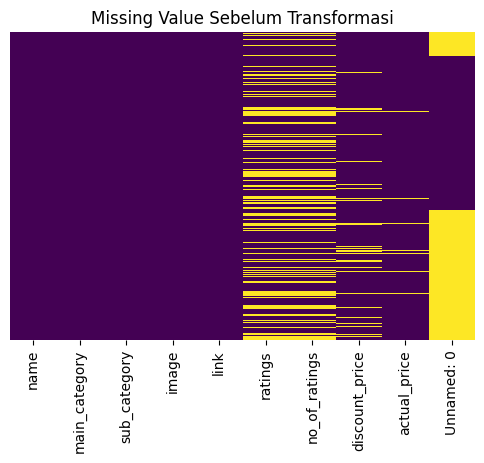

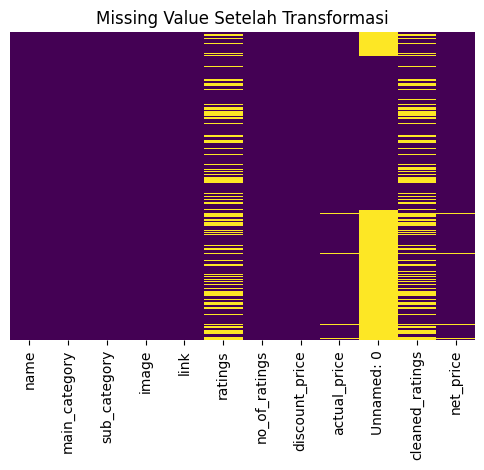

In [ ]:
# Fungsi untuk menampilkan heatmap missing value
def plot_missing_values(df, title):
    if isinstance(df, pd.Series):  # Pastikan input adalah DataFrame
        df = df.to_frame()
    plt.figure(figsize=(6, 4))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
    plt.title(title)
    plt.show()

# Visualisasi sebelum dan sesudah transformasi
plot_missing_values(prod, "Missing Value Sebelum Transformasi")
plot_missing_values(prod_copy, "Missing Value Setelah Transformasi")

In [ ]:
#Check Deskriptif Statistik
prod_copy.describe().round(2)

,no_of_ratings,discount_price,actual_price,Unnamed: 0,cleaned_ratings,net_price
count,1103170.00,1103170.00,1.067544e+06,551585.00,739116.00,1.067544e+06
mean,563.72,2332.29,2.311128e+04,7006.20,3.83,2.070116e+04
std,7095.12,8956.35,1.355081e+07,5740.84,0.76,1.355081e+07
min,0.00,0.00,0.000000e+00,0.00,1.00,0.000000e+00
25%,0.00,299.00,9.900000e+02,1550.00,3.50,4.020000e+02
50%,4.00,590.00,1.599000e+03,5933.00,3.90,8.220000e+02
75%,49.00,1249.00,2.999000e+03,11482.00,4.30,1.775000e+03
max,589547.00,1249990.00,9.900000e+09,19199.00,5.00,9.899999e+09


# Visualisasi Data

In [ ]:
display_data(prod_copy)


 Number of row: 1103170
 Number of columns: 12


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0,cleaned_ratings,net_price
0,"wipro 15W B22D LED Cool Day Light Bulb, Pack o...",home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61sxaKt9ec...,https://www.amazon.in/Wipro-Garnet-Base-15-Wat...,4.1,5874,379.0,850.0,NaN,4.1,471.0
1,Magicwand Round Moon Shaped Light Aluminium Al...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61Z7dG5v1K...,https://www.amazon.in/Round-Shaped-Light-Alumi...,3.9,1696,329.0,999.0,NaN,3.9,670.0
2,HOME CUBE Smart Control Sensor Led Night Light...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61e6Kayvjf...,https://www.amazon.in/HOME-CUBE-Control-Bedroo...,4.1,1855,569.0,999.0,NaN,4.1,430.0
3,GlowPro P20 LED Pen Flashlight - Pocket EDC To...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/61DDzStFnv...,https://www.amazon.in/GlowPro-P20-LED-Flashlig...,4.1,1263,350.0,375.0,NaN,4.1,25.0
4,X4cart Study Lamp LED Touch Desk Lamp USB Rech...,home & kitchen,Indoor Lighting,https://m.media-amazon.com/images/I/31VaYFLBRE...,https://www.amazon.in/X4cart-Lamp-Desk-Recharg...,3.4,62,299.0,999.0,NaN,3.4,700.0


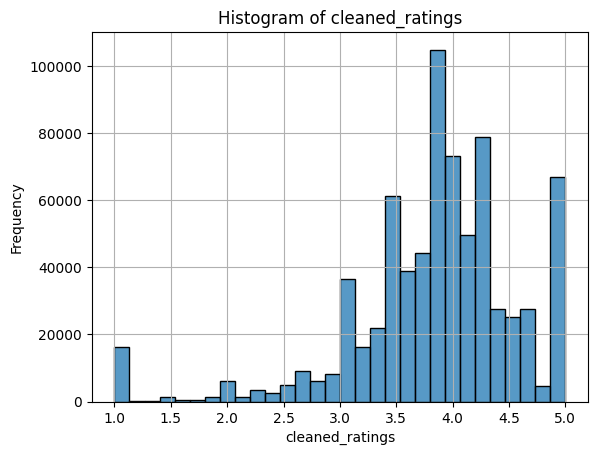

In [ ]:
# Membuat histogram menggunakan variabel cleaned_ratings
sns.histplot(prod_copy['cleaned_ratings'], kde=False, bins=30, palette='Blues_d')
plt.title(f'Histogram of cleaned_ratings')
plt.xlabel('cleaned_ratings')
plt.ylabel('Frequency')
plt.grid(True)

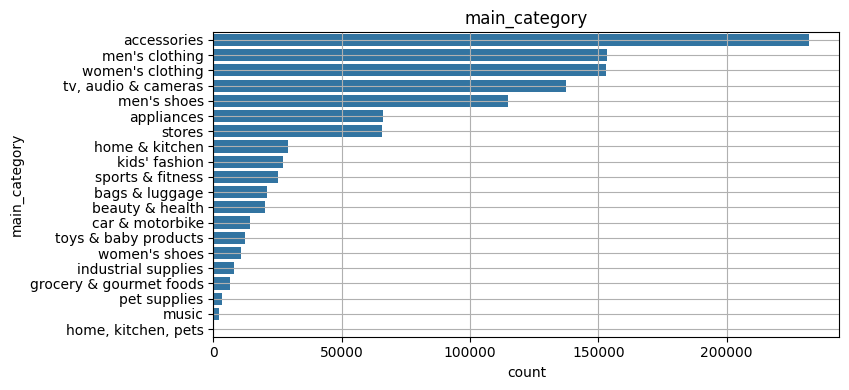

In [ ]:
# visualisasi setiap variabel kategorik pada data

data_ = prod_copy[['main_category',	'sub_category']]
# Menghitung jumlah variabel kategorik
num_variables = len(data_.columns)

# Tentukan jumlah kolom dan baris untuk subplot
num_cols = 2
num_rows = int(np.ceil(num_variables / num_cols))

# Membuat grid countplot dengan Seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

# Menggunakan Seaborn untuk membuat countplot atau pie chart
for i, ax in enumerate(axes.flatten()):
    if i < num_variables:
        col = data_.columns[i]
        unique_vals = data_[col].nunique()  # Hitung jumlah kategori unik

        # Jika kategori lebih dari 30, lewati
        if unique_vals > 30:
            fig.delaxes(ax)
            continue

        # Gunakan pie chart untuk kategori kurang dari 3
        elif unique_vals < 3:
            data = data_[col].value_counts()
            ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(data)))
            ax.set_title(f'{col} (Pie Chart)')
            ax.axis('equal')  # Agar pie chart berbentuk lingkaran

        # Gunakan countplot untuk kategori 3 hingga 15
        else:
            sns.countplot(y=col, data=data_, ax=ax, order=data_[col].value_counts(ascending=False).index)
            ax.set_title(col)
    else:
        fig.delaxes(ax)

# Mengatur layout
plt.tight_layout()
plt.grid(True)
plt.show()

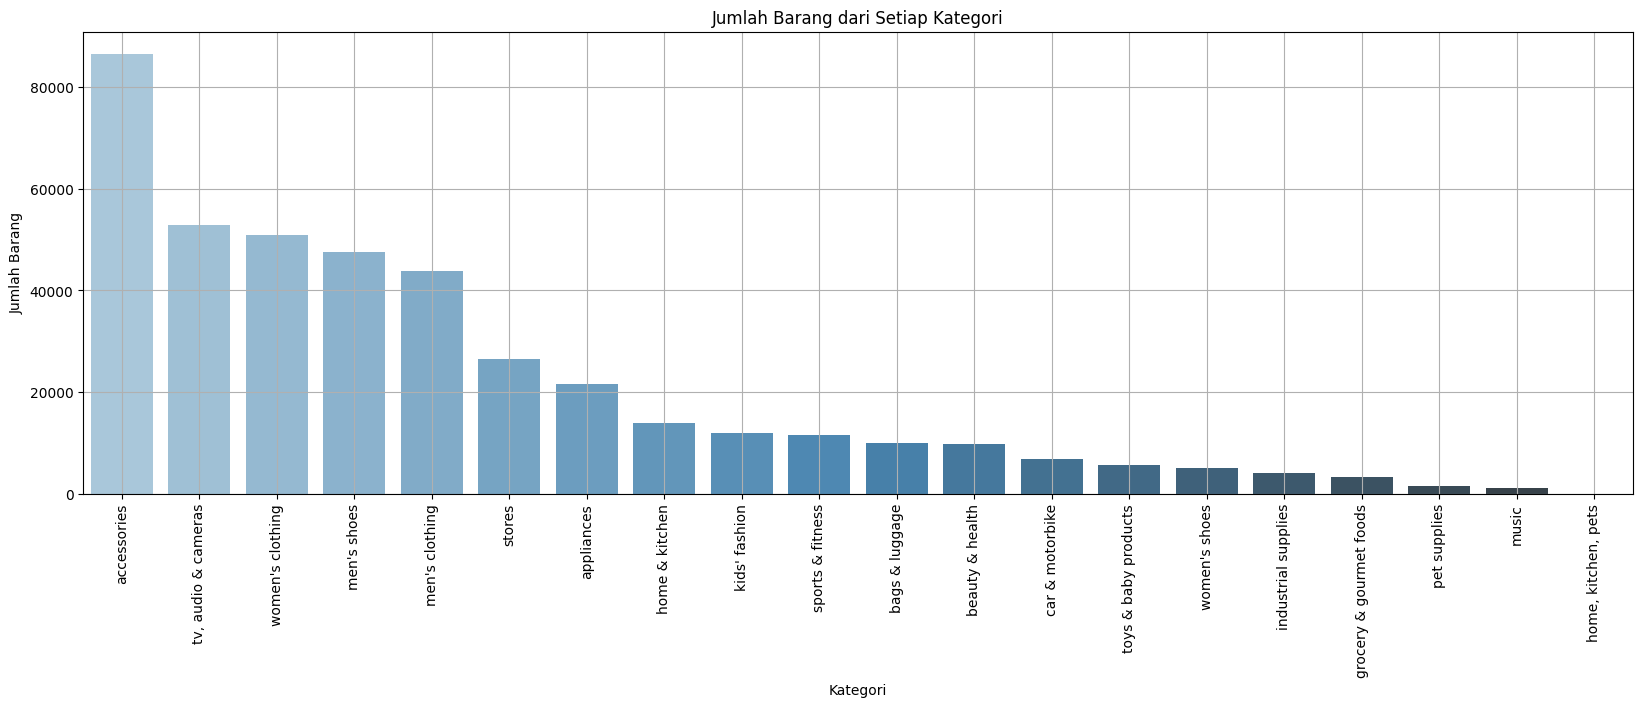

In [ ]:
# Mengelompokkan data berdasarkan 'category' dan menghitung jumlah barang
grouped_data = prod_copy.groupby('main_category')['name'].nunique().sort_values(ascending=False).reset_index()

# Membuat bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='main_category', y='name', data=grouped_data, palette='Blues_d')
plt.title('Jumlah Barang dari Setiap Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Barang')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

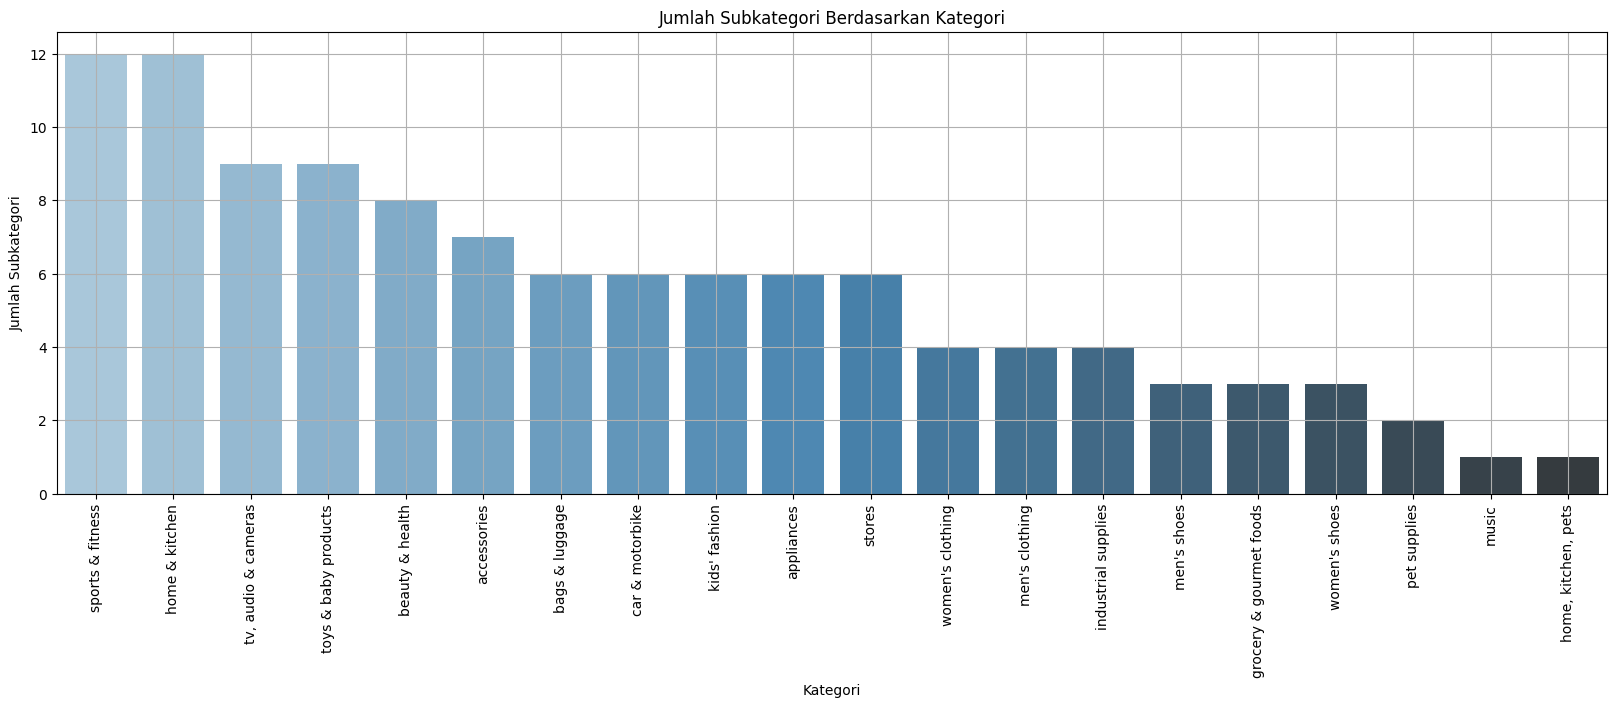

In [ ]:
# Mengelompokkan data berdasarkan 'category' dan menghitung jumlah sub_category
grouped_data = prod_copy.groupby('main_category')['sub_category'].nunique().sort_values(ascending=False).reset_index()

# Membuat bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='main_category', y='sub_category', data=grouped_data, palette='Blues_d')
plt.title('Jumlah Subkategori Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Subkategori')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

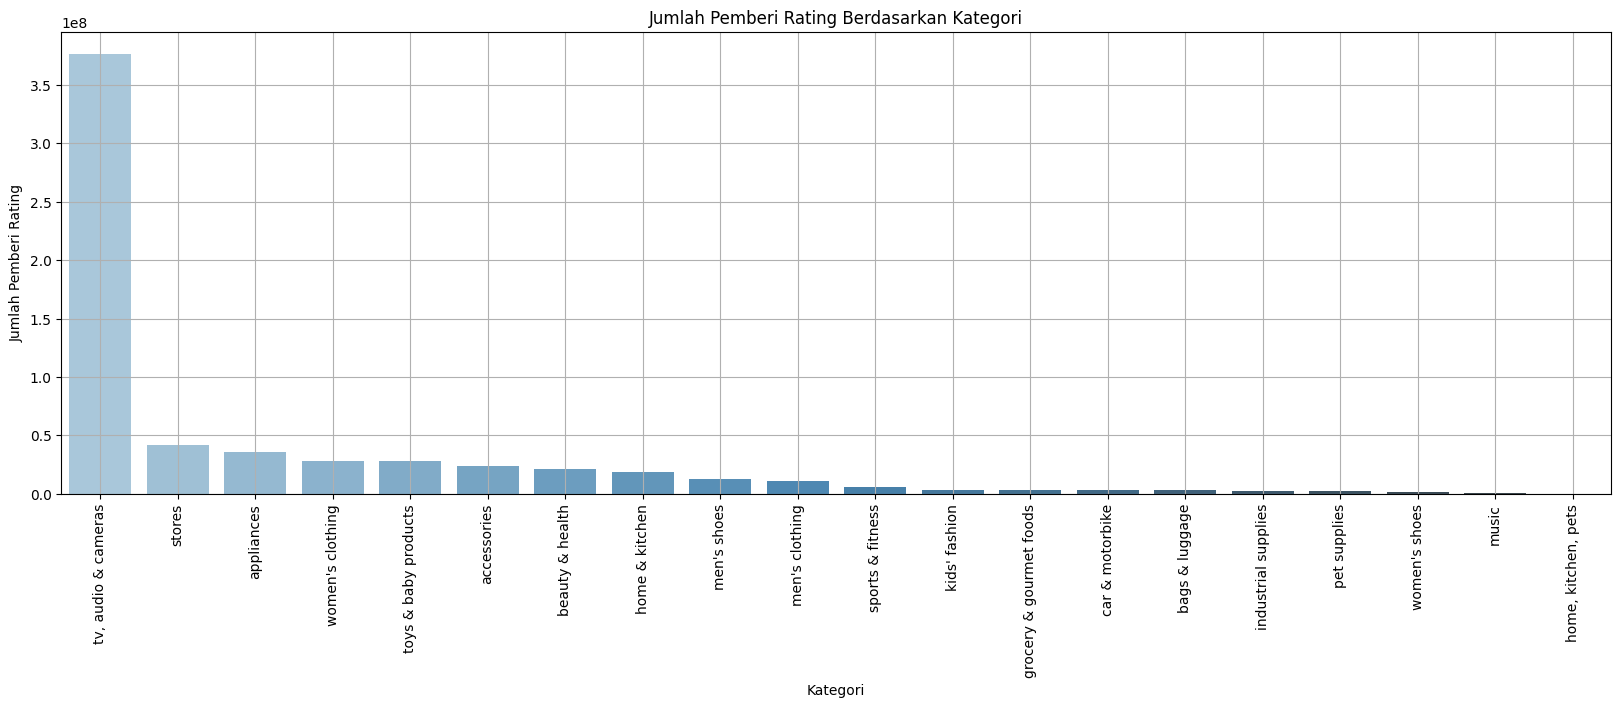

In [ ]:
# Mengelompokkan data berdasarkan 'category' dan menghitung jumlah 'no_of_ratings'
grouped_data = prod_copy.groupby('main_category')['no_of_ratings'].sum().sort_values(ascending=False).reset_index()

# Membuat bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='main_category', y='no_of_ratings', data=grouped_data, palette='Blues_d')
plt.title('Jumlah Pemberi Rating Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pemberi Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

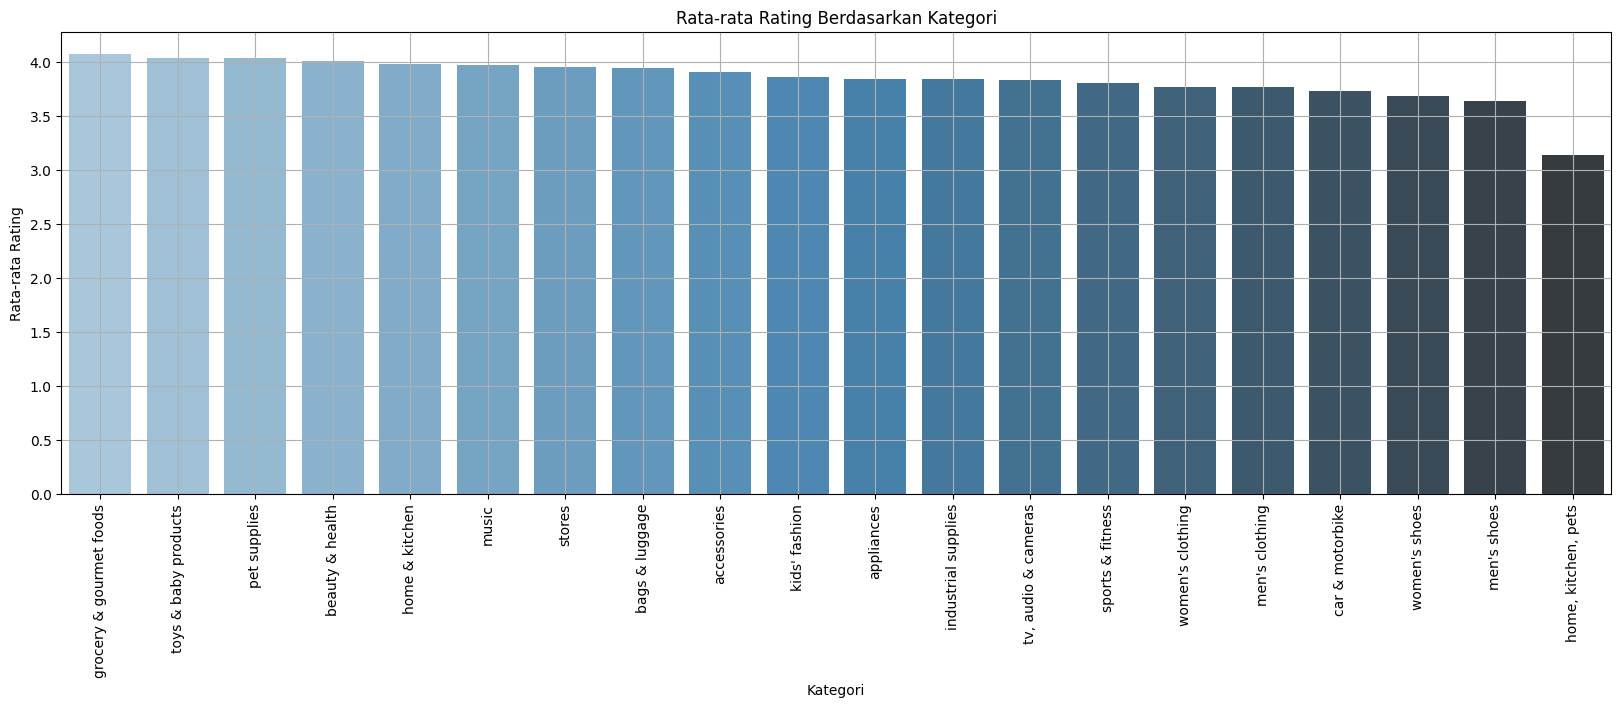

In [ ]:
# Mengelompokkan data berdasarkan 'category' dan menghitung rata-rata ratings
grouped_data = prod_copy.groupby('main_category')['cleaned_ratings'].mean().sort_values(ascending=False).reset_index()

# Membuat bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='main_category', y='cleaned_ratings', data=grouped_data, palette='Blues_d')
plt.title('Rata-rata Rating Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

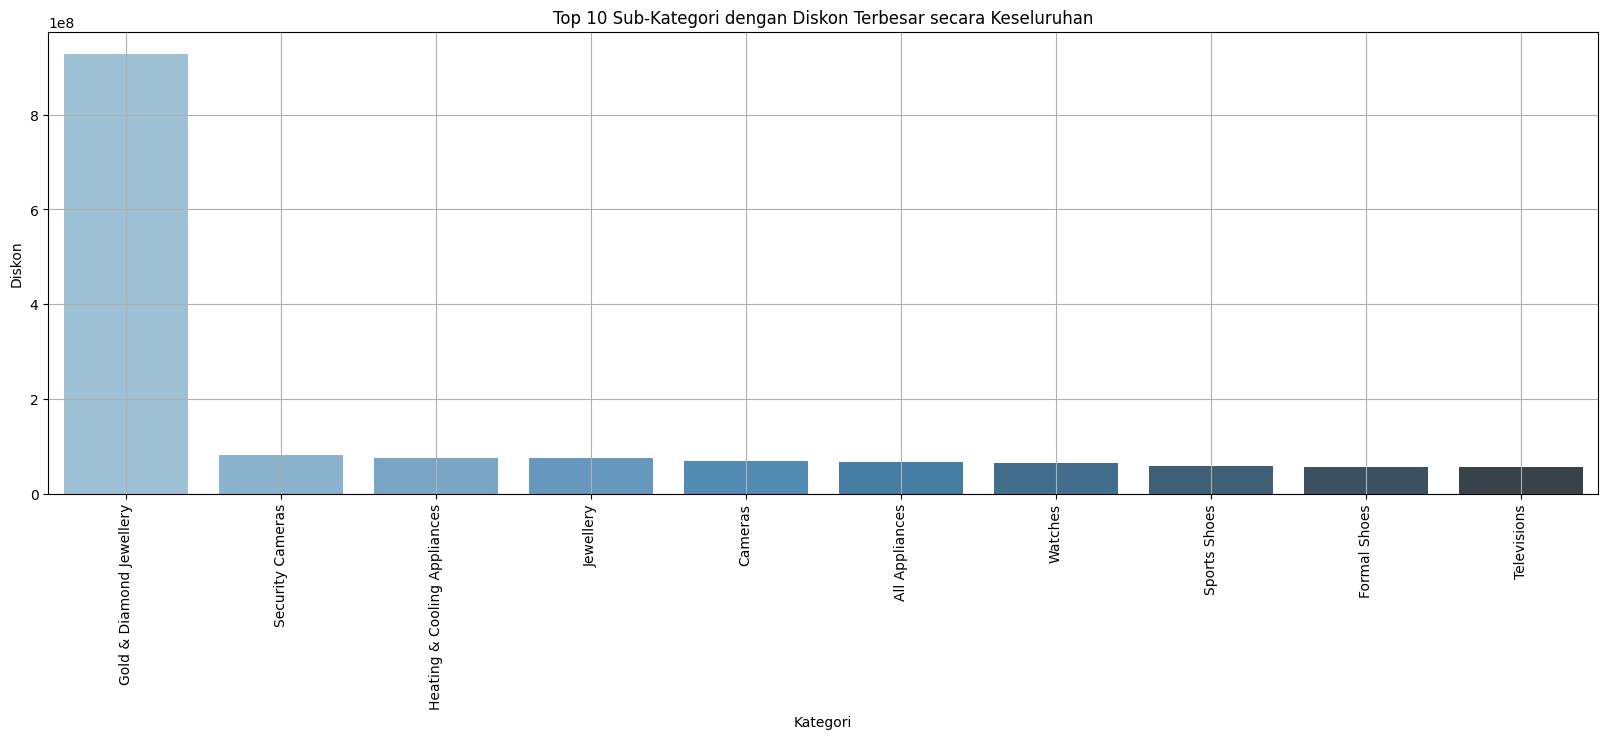

In [ ]:
# Mengelompokkan data berdasarkan 'sub_category' dan menghitung jumlah diskon
grouped_data = prod_copy.groupby('sub_category')['discount_price'].sum().sort_values(ascending=False).reset_index().head(10)

# Membuat bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='sub_category', y='discount_price', data=grouped_data, palette='Blues_d')
plt.title('Top 10 Sub-Kategori dengan Diskon Terbesar secara Keseluruhan')
plt.xlabel('Kategori')
plt.ylabel('Diskon')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

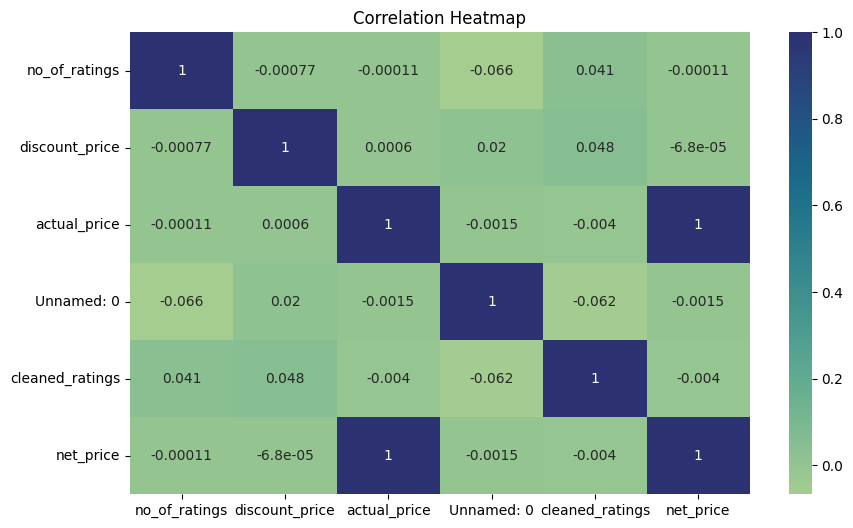

In [ ]:
# Calculate correlations
correlations = prod_copy.select_dtypes(include = ['int', 'float']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()